# Creating pie charts of the neuropils that occur in each cluster of the modularity data
- This will be done for combined, input and output networks


In [58]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from util import *

In [59]:
# Import files
hemibrain_version = "v1.2.1"
direct = "oviIN_combined/preprocessed-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
full = pd.read_csv(os.path.join(direct, filename),index_col=0)
log_msg("Adding 'type group'")
full['celltype'].fillna('None', inplace=True)
full["type_group"] = full["celltype"].apply(simplify_type)
log_msg("Done!")
full.head()

2024 01 31 19:42:24  Loading node dataframe
2024 01 31 19:42:24  Adding 'type group'
2024 01 31 19:42:24  Done!


,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre,post,...,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois,type_group
id,,,,,,,,,,,,,,,,,,,,,
1003215282,1,1,1,1,1,1,CL229_R,CL229,100,439,...,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",CL
1005952640,2,1,2,2,2,2,IB058_R,IB058,664,2047,...,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...",IB
1006928515,3,1,2,2,3,3,CL300_R,CL300,86,173,...,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",CL
1007260806,4,1,1,1,4,4,CL301_R,CL301,119,226,...,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S...",CL
1007308577,5,2,3,2,5,5,NaN,None,54,2740,...,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 5, 'post': 486, 'downstream...",NaN,"['ATL(L)', 'ATL(R)', 'GOR(L)', 'IB', 'ICL(L)',...","['ATL(L)', 'ATL(R)', 'IB', 'ICL(R)', 'INP', 'S...",None


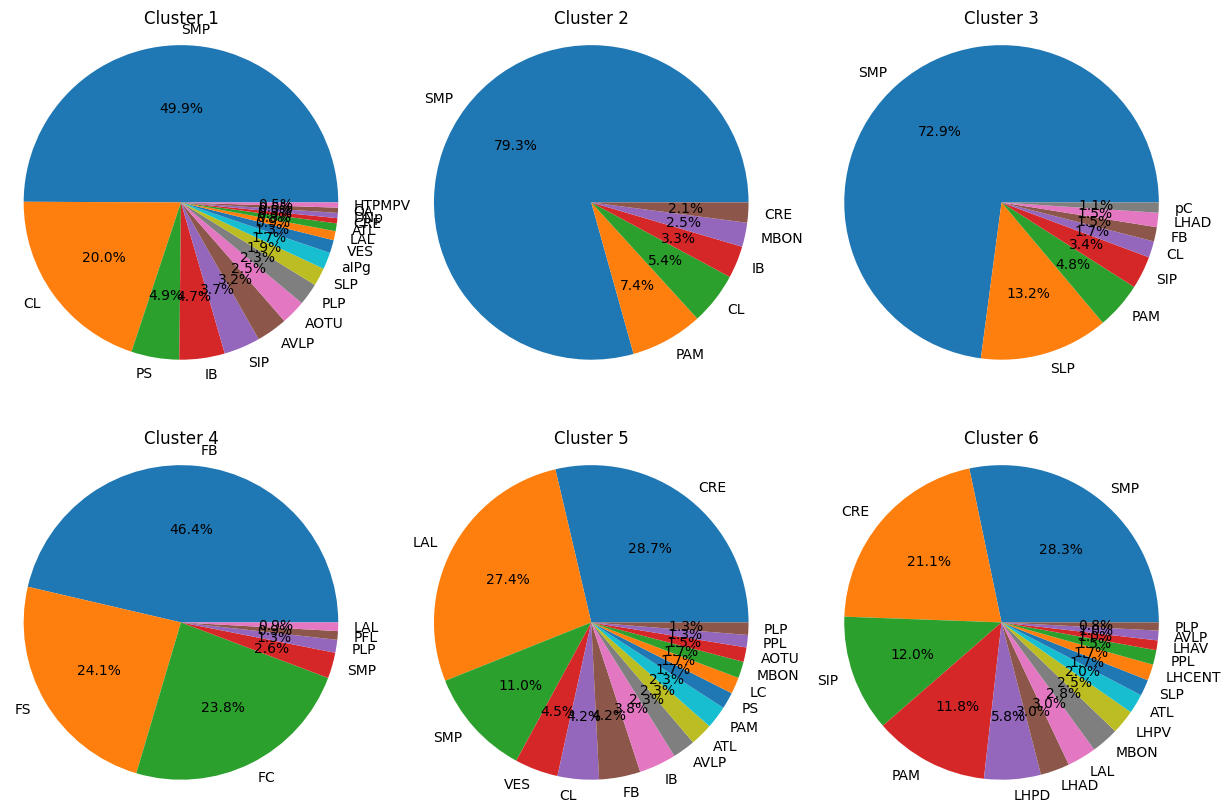

In [60]:
# Plots each cluster in a pie chart
cluster_list = [1,2,3,4,5,6] # create cluster list

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in cluster_list: 
    cluster = full[full['0.0'] == i] # create cluster dataframe
    # Filter data so that None is excluded and there is a cutoff of 3
    data = cluster['type_group'].value_counts()
    data = data[data.index != 'None']
    data = data[data > 3]
    # plot pie chart by value counts without none
    ax[int((i-1)/3), (i-1)%3].pie(data, labels = data.index, autopct='%1.1f%%', radius=1.15)
    ax[int((i-1)/3), (i-1)%3].set_title('Cluster ' + str(i))

## Repeat for inputs

In [61]:
hemibrain_version = "v1.2.1"
direct = "oviIN_combined/preprocessed_inputs-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
inputs = pd.read_csv(os.path.join(direct, filename),index_col=0)
log_msg("Adding 'type group'")
inputs['celltype'].fillna('None', inplace=True)
inputs["type_group"] = inputs["celltype"].apply(simplify_type)
log_msg("Done!")

2024 01 31 19:42:24  Loading node dataframe
2024 01 31 19:42:25  Adding 'type group'
2024 01 31 19:42:25  Done!


In [62]:
check = inputs[inputs['0.0'] == 5]
data = check['type_group'].value_counts()
#data = data[data.index != 'None']
#data = data[data > 5]

In [63]:
data

type_group
None     740
SMP      134
CL         6
MBON       4
IB         3
CRE        3
AVLP       2
LNd        2
DNp        1
PAM        1
LAL        1
pC         1
aMe        1
LPN        1
oviIN      1
SIP        1
OA         1
Name: count, dtype: int64

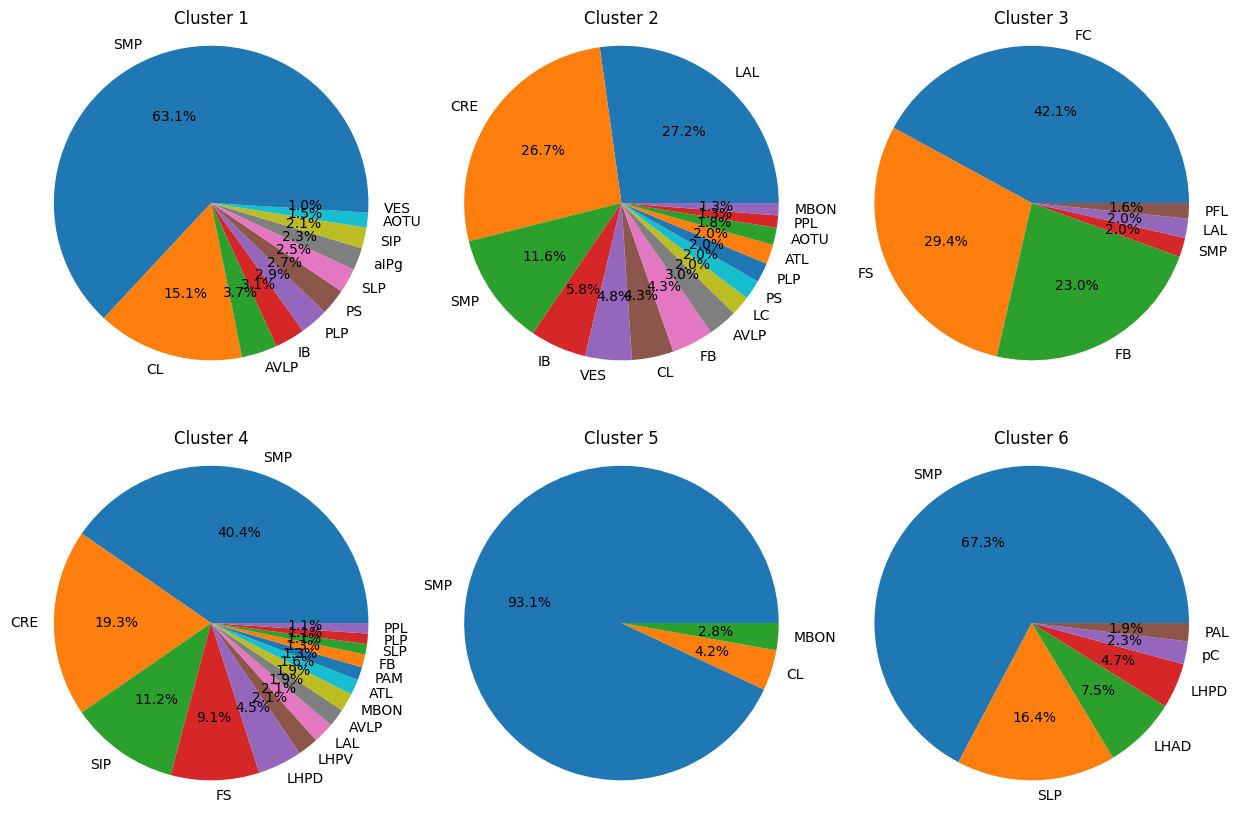

In [64]:
# Plots each cluster in a pie chart
cluster_list = [1,2,3,4,5,6] # create cluster list

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in cluster_list: 
    cluster = inputs[inputs['0.0'] == i] # create cluster dataframe
    # Filter data so that None is excluded and there is a cutoff of 5
    data = cluster['type_group'].value_counts()
    data = data[data.index != 'None']
    data = data[data > 3]
    # plot pie chart by value counts without none
    ax[int((i-1)/3), (i-1)%3].pie(data, labels = data.index, autopct='%1.1f%%',radius=1.15)
    ax[int((i-1)/3), (i-1)%3].set_title('Cluster ' + str(i))

# Repeat for outputs

In [65]:
hemibrain_version = "v1.2.1"
direct = "oviIN_combined/preprocessed_outputs-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
outputs = pd.read_csv(os.path.join(direct, filename),index_col=0)
log_msg("Adding 'type group'")
outputs['celltype'].fillna('None', inplace=True)
outputs["type_group"] = outputs["celltype"].apply(simplify_type)
log_msg("Done!")

2024 01 31 19:42:25  Loading node dataframe
2024 01 31 19:42:25  Adding 'type group'
2024 01 31 19:42:25  Done!


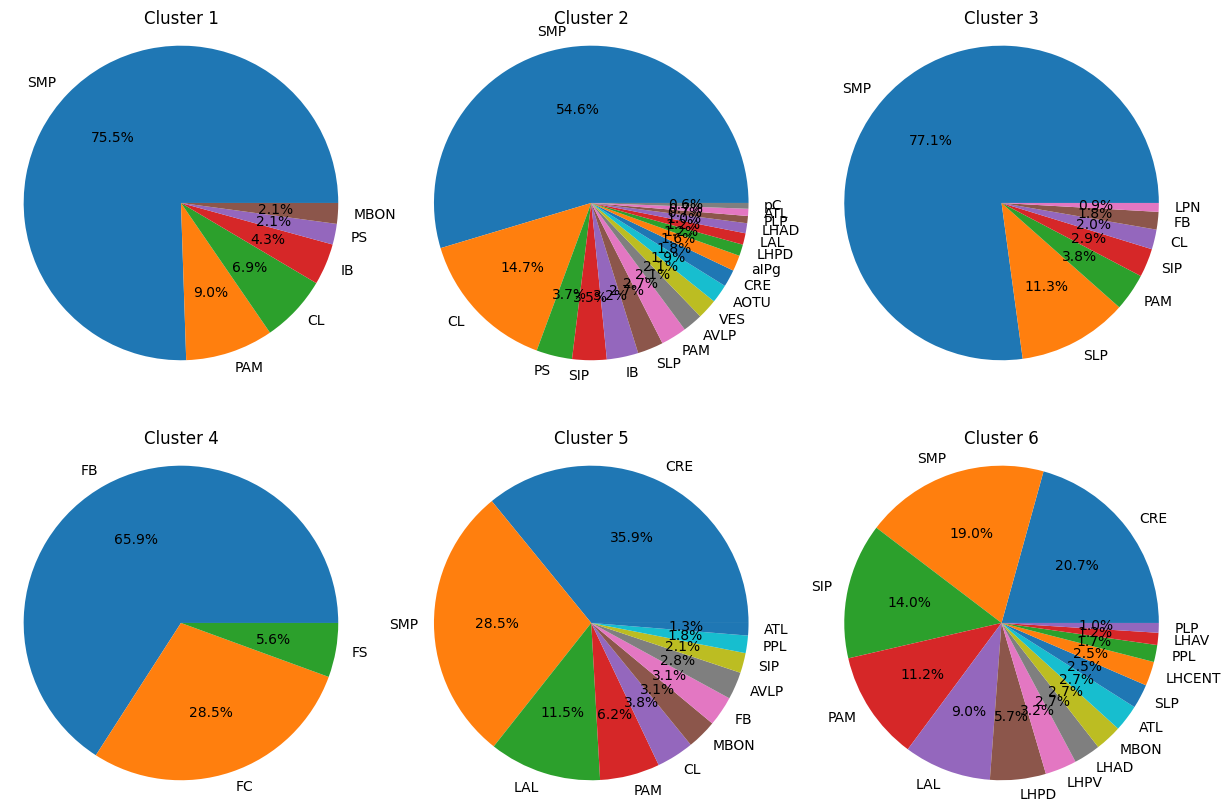

In [66]:
# Plots each cluster in a pie chart
cluster_list = [1,2,3,4,5,6] # create cluster list

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in cluster_list: 
    cluster = outputs[outputs['0.0'] == i] # create cluster dataframe
    # Filter data so that None is excluded and there is a cutoff of 5
    data = cluster['type_group'].value_counts()
    data = data[data.index != 'None']
    data = data[data > 3]
    # plot pie chart by value counts without none
    ax[int((i-1)/3), (i-1)%3].pie(data, labels = data.index, autopct='%1.1f%%', radius=1.15)
    ax[int((i-1)/3), (i-1)%3].set_title('Cluster ' + str(i))